In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from matplotlib import pyplot as plt
import pandas as pd
import pickle

data = None

with open("../pickles/preprocessed_data_nn.pkl","rb") as f:
    data = pickle.load(f)

X = data.drop('log_price', 1)
y = data['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Using TensorFlow backend.


In [2]:
def build_NN(X_train, y_train, layer_width, layers, activation_fn, batch, loss_fn):
    NN_model = Sequential()

    # The Hidden Layers :
    NN_model.add(Dense(32, kernel_initializer='normal',input_dim = data.shape[1]-1, activation='relu'))
    for i in range(layers):
        NN_model.add(Dense(layer_width, kernel_initializer='normal',activation=activation_fn))

    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # Compile the network :
    NN_model.compile(loss = loss_fn, optimizer='adam', metrics=['mse','mae'])
    #NN_model.summary()
    
    prefix = str(layers + 1) + 'x' + str(layer_width) + '_' + activation_fn + '_' + loss_fn + '_'+ str(batch)
    checkpoint_name = 'checkpoints/'+prefix+'__{val_loss:.5f}.hdf5'  # Depth x width_loss_activations_batch_size
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', save_best_only = True, mode ='auto')
    callbacks_list = [checkpoint]
    
    hist = NN_model.fit(X_train, y_train, epochs=50, batch_size=batch, verbose = 0, validation_split = 0.2, callbacks=callbacks_list)
    return NN_model, hist, prefix

In [3]:
def get_mse(model, X_test, y_test):
    preds = NN_model.predict(X_test)
    return metrics.mean_squared_error(preds,y_test)

In [4]:
def show_plot(hist, name):
    # plot loss during training
    plt.title(name)
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.legend()
    plt.show()

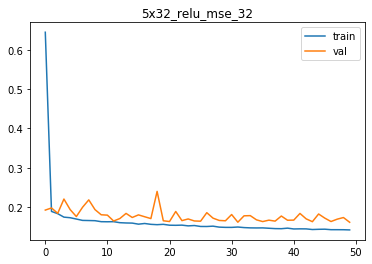

0.15417947076354424


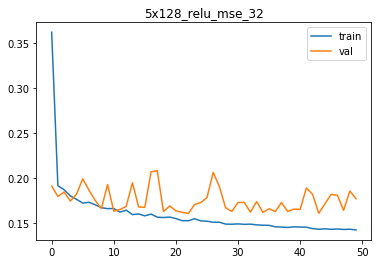

0.17042396764564222


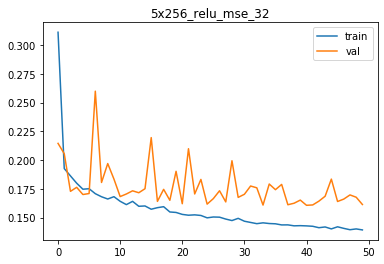

0.15479445607862985


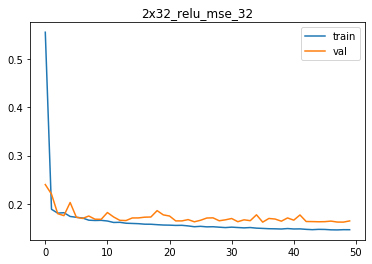

0.15829847452563972


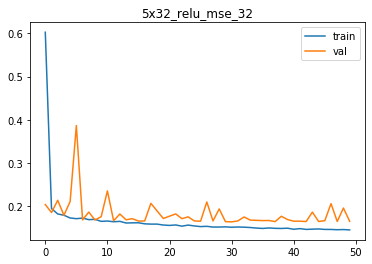

0.15839866361927513


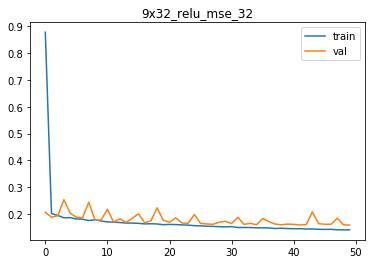

0.15302125004359599


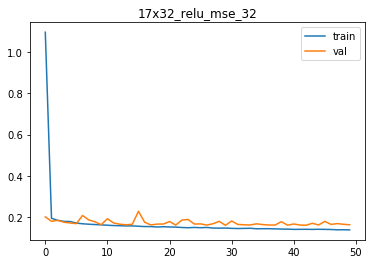

0.15822405492642272


In [5]:
# wider layer
NN_model, hist, name = build_NN(X_train, y_train, 32, 4, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 128, 4, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 256, 4, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

# deeper layers
NN_model, hist, name = build_NN(X_train, y_train, 32, 1, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 32, 4, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 32, 8, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 32, 16, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

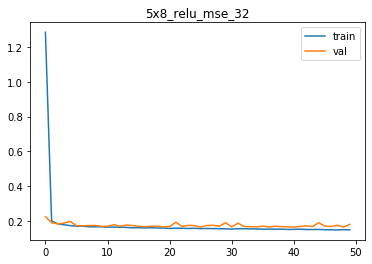

0.17307329965649632


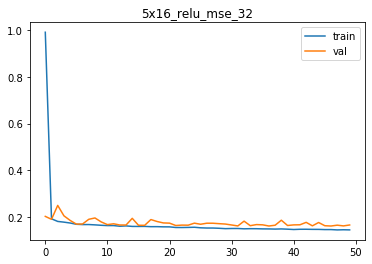

0.1594820421067284


In [6]:
# 32 width is optimal. 9 depth is optimal.

# Checking for smaller widths
NN_model, hist, name = build_NN(X_train, y_train, 8, 4, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 16, 4, 'relu', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

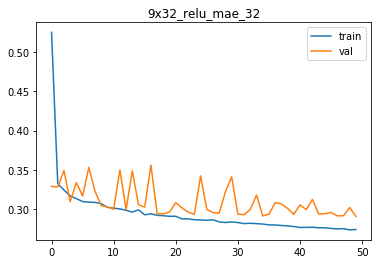

0.1581170385476567


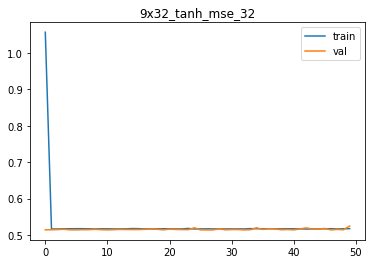

0.5238097607726891


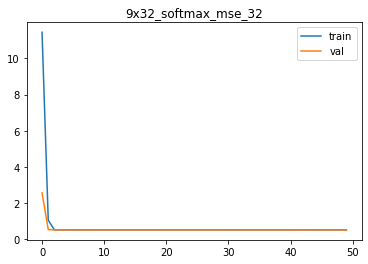

0.5158103607565511


In [7]:
# 32 width is optimal.

# checking for other parameters
NN_model, hist, name = build_NN(X_train, y_train, 32, 8, 'relu', 32, 'mae') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 32, 8, 'tanh', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))

NN_model, hist, name = build_NN(X_train, y_train, 32, 8, 'softmax', 32, 'mse') # width, depth, activation_fn, batch, loss_fn
show_plot(hist, name)
print(get_mse(NN_model, X_test, y_test))


In [ ]:
# Relu + linear is best.